In [1]:
import pandas as pd
pd.set_option('display.max_colwidth',500)
import numpy as np
import matplotlib.pyplot as plt
import _pickle as pickle
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler


In [2]:
with open("profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

In [3]:
df

,biography,detective,fiction,mystery,non fiction,novel,Book,action,bollywood,comedy,...,pop,rock,Music,baseball,basketball,chess,cricket,football,hockey,Sport
0,9,7,2,5,0,8,8,7,8,5,...,3,4,2,1,3,6,1,7,2,9


In [4]:
scaler = MinMaxScaler()

In [5]:
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns[0:],index=df.index)

In [6]:
df

,biography,detective,fiction,mystery,non fiction,novel,Book,action,bollywood,comedy,...,pop,rock,Music,baseball,basketball,chess,cricket,football,hockey,Sport
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:

cluster_cnt = [i for i in range(2, 20, 1)]


s_scores = []

db_scores = []


for i in cluster_cnt:
    
    
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(df)
    
    cluster_assignments = hac.labels_
    
    s_scores.append(silhouette_score(df, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df, cluster_assignments))

ValueError: Found array with 1 sample(s) (shape=(1, 33)) while a minimum of 2 is required by AgglomerativeClustering.

Max Value:
Cluster # Empty DataFrame
Columns: [Cluster Score]
Index: []

Min Value:
Cluster # Empty DataFrame
Columns: [Cluster Score]
Index: []


ValueError: x and y must have same first dimension, but have shapes (18,) and (0,)

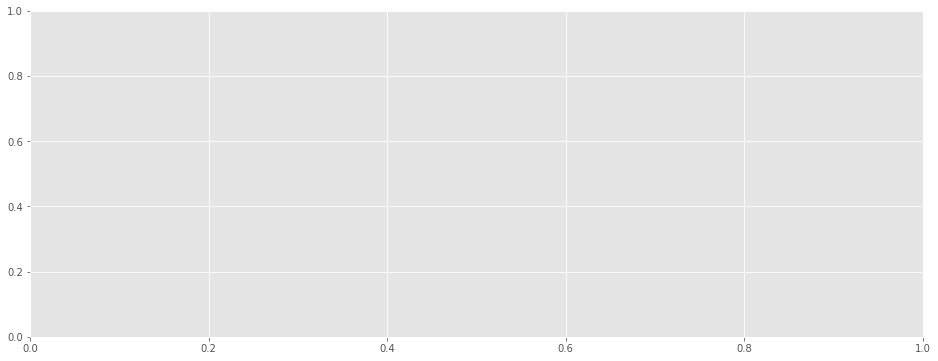

In [8]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()
    

plot_evaluation(s_scores)

plot_evaluation(db_scores)

In [9]:
hac = AgglomerativeClustering(n_clusters=12)


hac.fit(df)


cluster_assignments = hac.labels_


df = (pd.DataFrame(scaler.inverse_transform(df), columns=df.columns[0:], index=df.index))


df['Cluster #'] = cluster_assignments


df

,Movies,Books,Music,Sports,Politics,uid,Cluster #
0,9.0,8.0,8.0,6.0,6.0,10.0,1
1,10.0,9.0,9.0,5.0,5.0,2.0,11
2,9.0,5.0,4.0,3.0,2.0,6.0,1
3,1.0,9.0,6.0,6.0,2.0,9.0,4
4,6.0,5.0,2.0,4.0,5.0,3.0,0
...,...,...,...,...,...,...,...
66,6.0,8.0,6.0,9.0,8.0,2.0,6
67,3.0,5.0,2.0,7.0,7.0,9.0,10
68,0.0,5.0,4.0,6.0,9.0,0.0,5
69,0.0,5.0,8.0,3.0,1.0,2.0,9


In [10]:
df.head()

,Movies,Books,Music,Sports,Politics,uid,Cluster #
0,9.0,8.0,8.0,6.0,6.0,10.0,1
1,10.0,9.0,9.0,5.0,5.0,2.0,11
2,9.0,5.0,4.0,3.0,2.0,6.0,1
3,1.0,9.0,6.0,6.0,2.0,9.0,4
4,6.0,5.0,2.0,4.0,5.0,3.0,0


In [11]:
import random

# Randomly choosing a cluster
rand_cluster = random.choice(df['Cluster #'].unique())

# Assigning the Cluster Profiles as a new DF
group = df[df['Cluster #']==rand_cluster].drop('Cluster #', axis=1)


## Vectorizing the Bios in the Selected Cluster

# Fitting the vectorizer to the Bios


# Creating a new DF that contains the vectorized words
#cluster_v = pd.DataFrame(cluster_x.toarray(), index=group.index, columns=vectorizer.get_feature_names())

# Joining the vector DF and the original DF
#group = group.join(cluster_v)

# Dropping the Bios because it is no longer needed in place of vectorization
#group.drop('Bios', axis=1, inplace=True)


## Finding Correlations among the users

# Trasnposing the DF so that we are correlating with the index(users)
corr_group = group.T.corr()


## Finding the Top 10 Similar Users

# Randomly selecting a user
random_user = random.choice(corr_group.index)
corr_group

,0,2,5,18,23,28,34,38,49,62
0,1.000000,0.795962,0.569803,0.768210,0.567192,0.778581,0.706033,0.397231,0.781997,0.800894
2,0.795962,1.000000,0.392114,0.837711,0.279823,0.742530,0.947924,0.854242,0.796585,0.677445
5,0.569803,0.392114,1.000000,0.616435,0.292770,0.429064,0.502331,0.107583,0.702251,0.746164
18,0.768210,0.837711,0.616435,1.000000,0.261978,0.637926,0.789119,0.716233,0.969518,0.531043
23,0.567192,0.279823,0.292770,0.261978,1.000000,0.840668,0.375839,0.037796,0.140981,0.381025
28,0.778581,0.742530,0.429064,0.637926,0.840668,1.000000,0.812390,0.536875,0.518519,0.618540
34,0.706033,0.947924,0.502331,0.789119,0.375839,0.812390,1.000000,0.843059,0.725683,0.706058
38,0.397231,0.854242,0.107583,0.716233,0.037796,0.536875,0.843059,1.000000,0.606128,0.262105
49,0.781997,0.796585,0.702251,0.969518,0.140981,0.518519,0.725683,0.606128,1.000000,0.620437
62,0.800894,0.677445,0.746164,0.531043,0.381025,0.618540,0.706058,0.262105,0.620437,1.000000


In [12]:

print("Top 10 most similar users to User #", random_user, '\n')

# Creating a DF with the top 10 most similar users to the selected user
top_10_sim = corr_group[[random_user]].sort_values(by=[random_user],axis=0, ascending=False)[1:11]

# Printing out the results
print(top_10_sim)

print("\nThe most similar user to User #", random_user, "is User #", top_10_sim.index[0])

Top 10 most similar users to User # 2 

           2
34  0.947924
38  0.854242
18  0.837711
49  0.796585
0   0.795962
28  0.742530
62  0.677445
5   0.392114
23  0.279823

The most similar user to User # 2 is User # 34


In [23]:
random_user = random.choice(corr_group.index)

type(random_user)

numpy.int64

In [24]:
random_user

10

In [13]:
corr_group

,0,2,5,18,23,28,34,38,49,62
0,1.000000,0.795962,0.569803,0.768210,0.567192,0.778581,0.706033,0.397231,0.781997,0.800894
2,0.795962,1.000000,0.392114,0.837711,0.279823,0.742530,0.947924,0.854242,0.796585,0.677445
5,0.569803,0.392114,1.000000,0.616435,0.292770,0.429064,0.502331,0.107583,0.702251,0.746164
18,0.768210,0.837711,0.616435,1.000000,0.261978,0.637926,0.789119,0.716233,0.969518,0.531043
23,0.567192,0.279823,0.292770,0.261978,1.000000,0.840668,0.375839,0.037796,0.140981,0.381025
28,0.778581,0.742530,0.429064,0.637926,0.840668,1.000000,0.812390,0.536875,0.518519,0.618540
34,0.706033,0.947924,0.502331,0.789119,0.375839,0.812390,1.000000,0.843059,0.725683,0.706058
38,0.397231,0.854242,0.107583,0.716233,0.037796,0.536875,0.843059,1.000000,0.606128,0.262105
49,0.781997,0.796585,0.702251,0.969518,0.140981,0.518519,0.725683,0.606128,1.000000,0.620437
62,0.800894,0.677445,0.746164,0.531043,0.381025,0.618540,0.706058,0.262105,0.620437,1.000000


In [26]:
with open("profiles_clustered.pkl","wb") as fp:
    pickle.dump(df,fp)

In [27]:
df

,Movies,Books,Music,Sports,Politics,uid,Cluster #
0,9.0,8.0,8.0,6.0,6.0,10.0,1
1,10.0,9.0,9.0,5.0,5.0,2.0,11
2,9.0,5.0,4.0,3.0,2.0,6.0,1
3,1.0,9.0,6.0,6.0,2.0,9.0,9
4,6.0,5.0,2.0,4.0,5.0,3.0,0
...,...,...,...,...,...,...,...
65,9.0,1.0,7.0,8.0,2.0,3.0,8
66,6.0,8.0,6.0,9.0,8.0,2.0,4
67,3.0,5.0,2.0,7.0,7.0,9.0,10
68,0.0,5.0,4.0,6.0,9.0,0.0,7
